/home/ray/miniconda3/envs/learning/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/ray/miniconda3/envs/learning/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Total convolution layers: 49
conv_layers
Image :  data/test/test/5446.jpg
img shape :  (500, 280, 3)
type torch_img :  <class 'PIL.Image.Image'>
49
torch.Size([64, 64, 64])
torch.Size([64, 64, 64])
torch.Size([64, 64, 64])
torch.Size([256, 64, 64])
torch.Size([64, 64, 64])
torch.Size([64, 64, 64])
torch.Size([256, 64, 64])
torch.Size([64, 64, 64])
torch.Size([64, 64, 64])
torch.Size([256, 64, 64])
torch.Size([128, 64, 64])
torch.Size([128, 32, 32])
torch.Size([512, 32, 32])
torch.Size([128, 32, 32])
torch.Size([128, 32, 32])
torch.Size([512, 32, 32])
torch.Size([128, 32, 32])
torch.Size([128, 32, 32])
torch.Size([512, 32, 32])
torch.Size([128, 32, 32])
torch.Size([128, 32, 32])
torch.Size([512, 32, 32])
torch.Size([256, 32, 32])
torch.Size([256, 16, 16])
torch.Size([1024, 16, 16])
torch.Size([256, 16, 16])
torch.Size([256, 16, 16])
torch.Size([1024, 16, 16])
torch.Size([256, 16, 16])
torch.Size([256, 16, 16])
torch.Size([1024, 16, 16])
torch.Size([256, 16, 16])
torch.Size([256, 16, 16]

ValueError: num must be an integer with 1 <= num <= 20, not 21

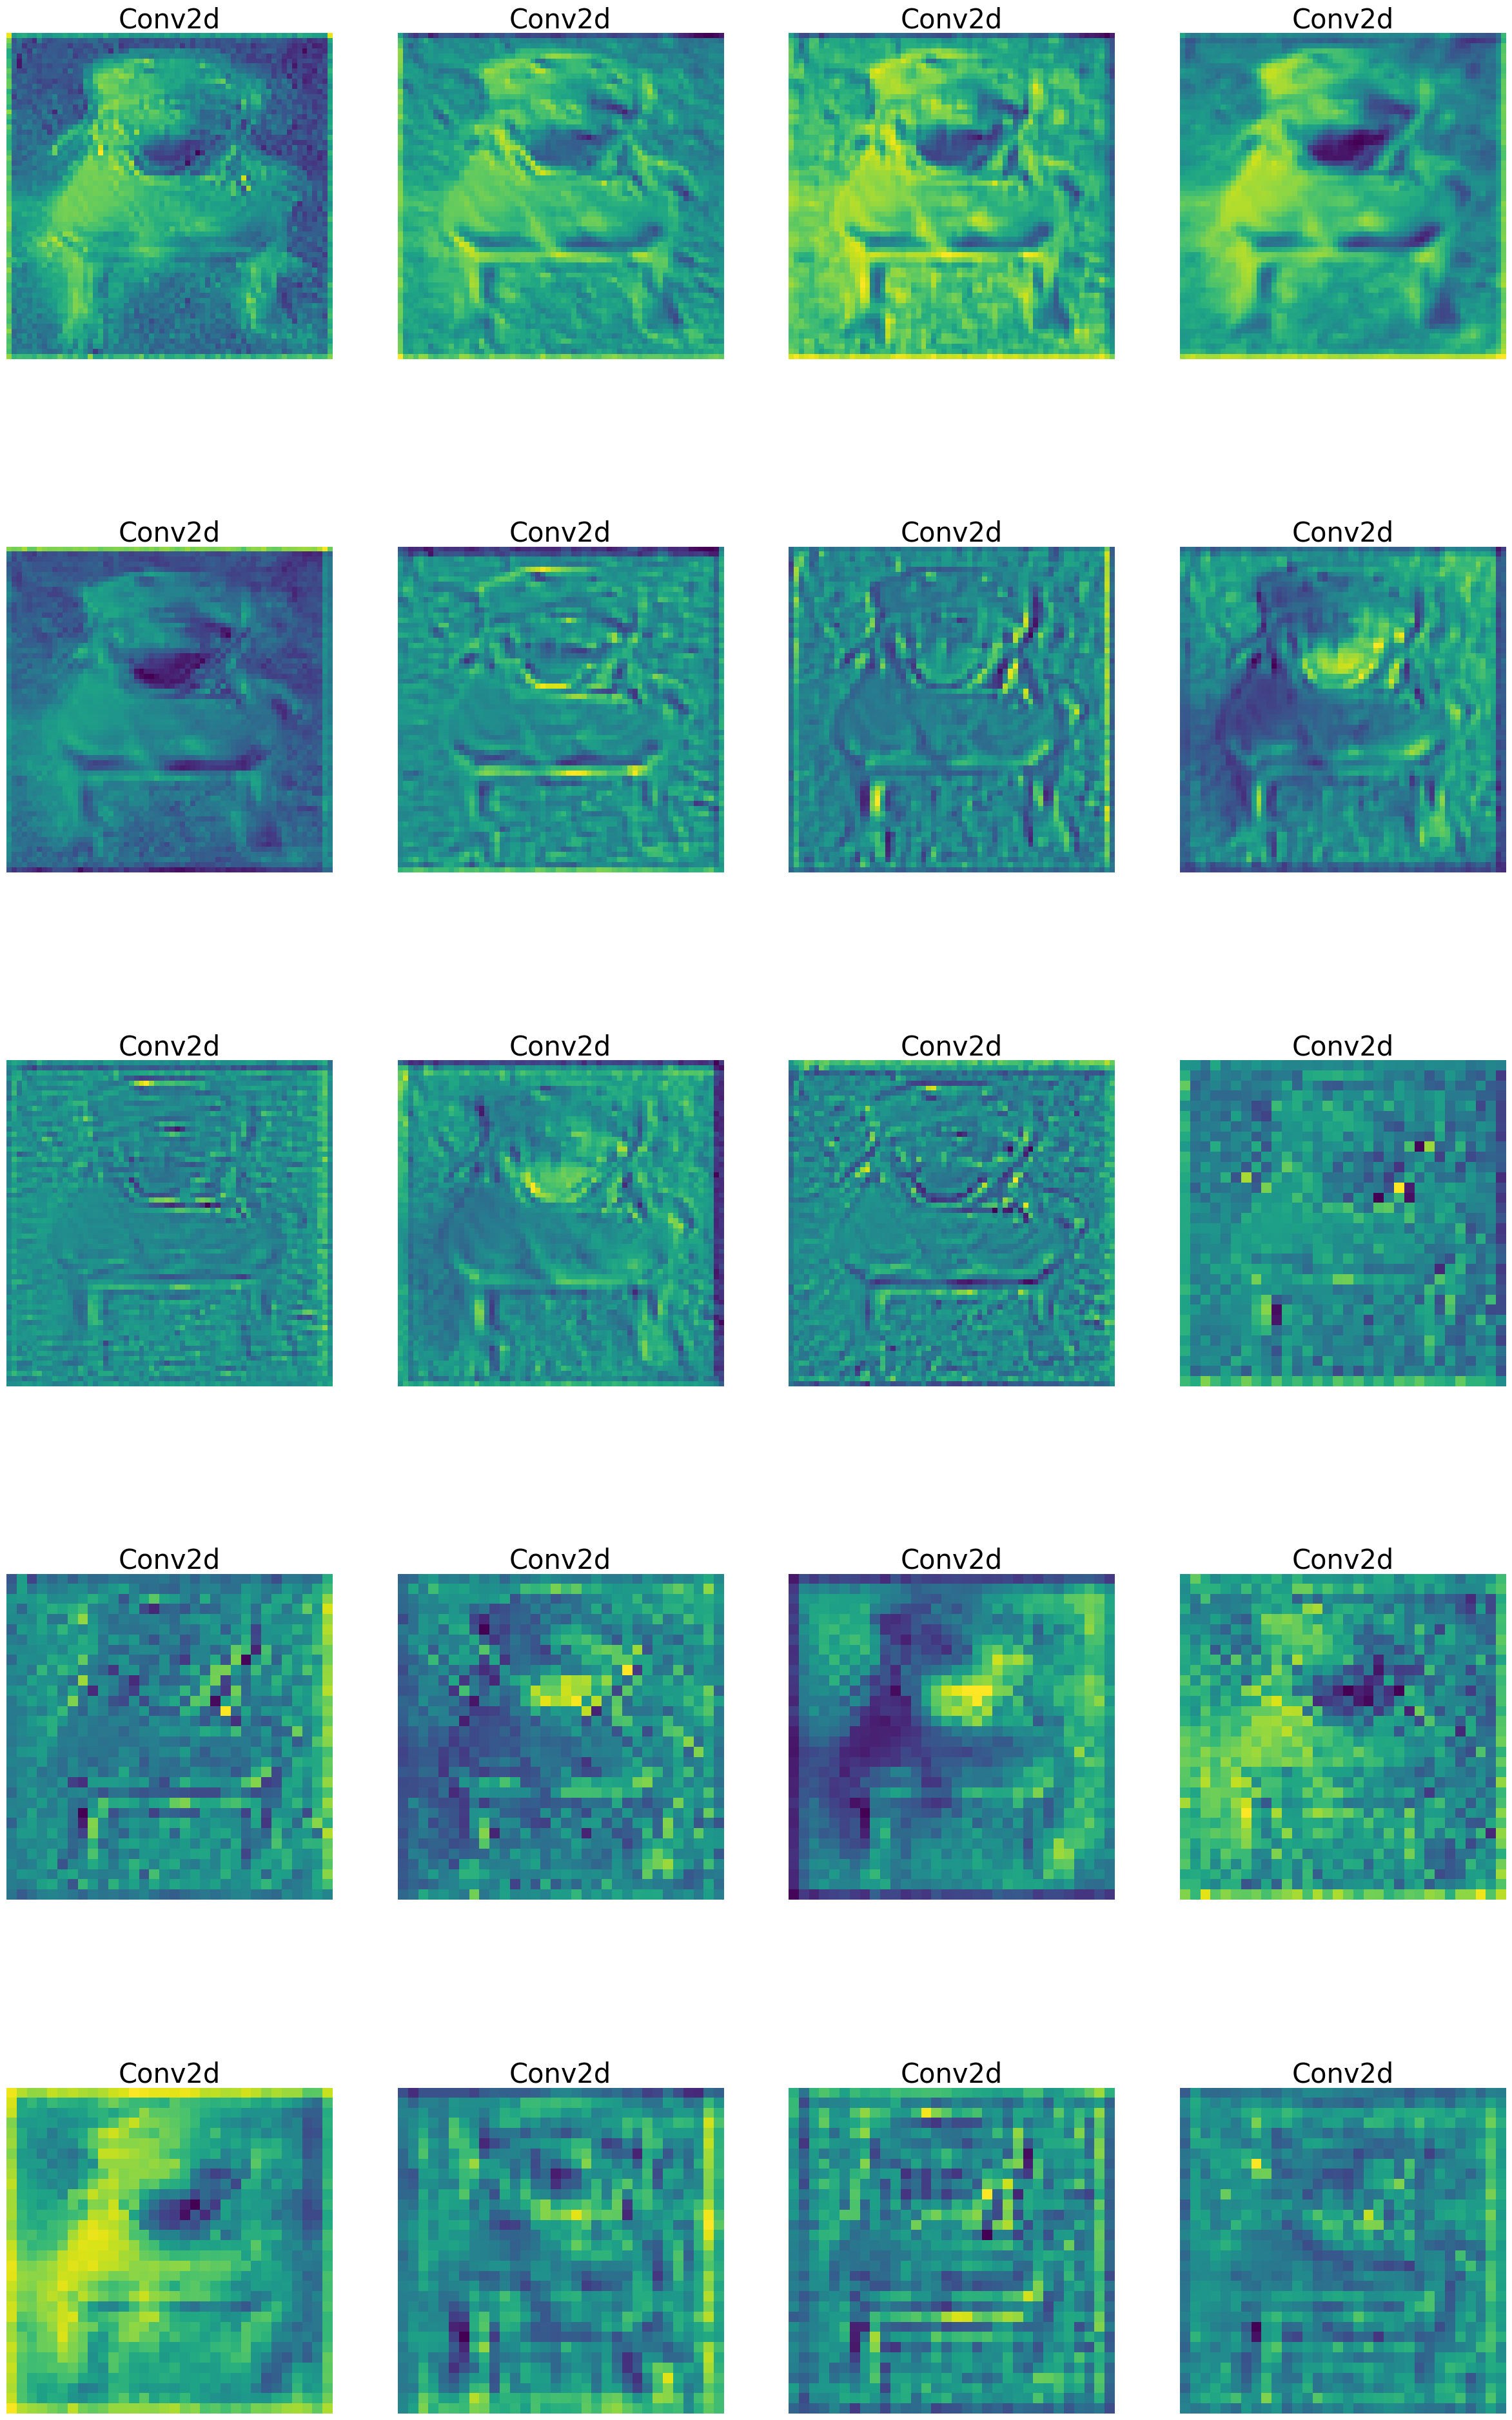

In [3]:
import numpy as np # linear algebra
import os
import matplotlib.pyplot as plt
import torch
from PIL import Image

from src.gradcam import GradCam, eval_image, get_bdbox_from_heatmap
from src.data_loading import get_resnet_transforms
from src.model import ResNet
import matplotlib.pyplot as plt


device = 'cuda' if torch.cuda.is_available() else 'cpu'

n_classes = 2
model = ResNet(nbr_classes=2)
tr = get_resnet_transforms()
# In ResNet 50, layer4 is the last module containing Conv boxes ( after that there is average pooling, fully connected .. )
# In this module the layer2 will get us the last conv layer

grad_cam = GradCam(model.model,  feature_layer=model.model.layer4, target_layer=['2'], device=device)
threshold = 0.2

# list images in folder
image_folder_path = 'data/test/test'
images = [os.path.join(image_folder_path, filename) for filename  in  os.listdir(image_folder_path)[1:20]]

for image in images:
    # Apply gradcam algorithm on the image
    # In the output of the fully connected layer, the fifth neuron ocrresponds ( after softmax ) to the probability of being an image of a dog
    print("Image : ", image)
    input_img, grayscale_cam, cam, img = eval_image(grad_cam, image, target_category=1, transform_pipeline=tr)
    model.visualize_feature_maps(tr(Image.open(image)).to(device))
    # Extract all objects from heatmap
    objects = get_bdbox_from_heatmap(grayscale_cam, threshold=threshold)
    #  Loop in each one of the objects and adding it in the detection output
    for obj in objects[::-1]:
        xmin, xmax, ymin, ymax, width, height = obj
        bbox = np.r_[int(xmin), int(ymin), int(xmax), int(ymax)]
    # plot input img and grayscale cam and cam
    # change  input_img shapee from (1, 3, 128, 128) to (128, 128, 3)
    input_img = np.transpose(input_img.squeeze(), (1, 2, 0))
    
    # plt.figure()
    # plt.imshow(input_img)
    plt.figure()
    plt.imshow(grayscale_cam)
    plt.figure()
    plt.imshow(cam)
    break
plt.show()